In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

# Model
from sklearn.tree import DecisionTreeClassifier

# For reproducible results
RANDOM_STATE_SEED = 732

In [3]:
df_dataset = pd.read_csv("processed_dataset_in_3.csv")
df_dataset


0         1         2         3         4         5    6  \
0       1.178200e-03  0.000222  0.000101  0.000502  0.000037  0.118060  0.0   
1       2.333333e-06  0.000028  0.000014  0.000035  0.000000  0.022209  0.0   
2       2.331858e-03  0.000278  0.000217  0.000987  0.000104  0.225015  0.0   
3       1.091667e-06  0.000028  0.000000  0.000000  0.000000  0.000000  0.0   
4       2.283458e-03  0.000222  0.000188  0.001168  0.000061  0.302162  0.0   
...              ...       ...       ...       ...       ...       ...  ...   
580074  3.500000e-07  0.000000  0.000014  0.000000  0.000000  0.000000  0.0   
580075  2.000000e-07  0.000000  0.000014  0.000000  0.000000  0.000000  0.0   
580076  3.000000e-07  0.000000  0.000014  0.000000  0.000000  0.000000  0.0   
580077  3.333333e-07  0.000000  0.000014  0.000000  0.000000  0.000000  0.0   
580078  2.916667e-07  0.000000  0.000014  0.000000  0.000000  0.000000  0.0   

               7         8    9  ...        56        57   58   59   60   61  \
0       0.042085  0.084789  1.0  ...  0.000432  0.454545  0.0  0.0  0.0  0.0   
1       0.013014  0.026027  0.0  ...  0.000000  0.454545  0.0  0.0  0.0  0.0   
2       0.067621  0.125335  1.0  ...  0.000540  0.454545  0.0  0.0  0.0  0.0   
3       0.000000  0.000000  0.0  ...  0.000000  0.454545  0.0  0.0  0.0  0.0   
4       0.097793  0.178121  1.0  ...  0.000540  0.454545  0.0  0.0  0.0  0.0   
...          ...       ...  ...  ...       ...       ...  ...  ...  ...  ...   
580074  0.000000  0.000000  0.0  ...  0.000000  0.909091  0.0  0.0  0.0  0.0   
580075  0.000000  0.000000  0.0  ...  0.000000  0.909091  0.0  0.0  0.0  0.0   
580076  0.000000  0.000000  0.0  ...  0.000000  0.909091  0.0  0.0  0.0  0.0   
580077  0.000000  0.000000  0.0  ...  0.000000  0.909091  0.0  0.0  0.0  0.0   
580078  0.000000  0.000000  0.0  ...  0.000000  0.909091  0.0  0.0  0.0  0.0   

         62   63   64   65  
0       0.0  0.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  
580074  0.0  0.0  0.0  0.0  
580075  0.0  0.0  0.0  0.0  
580076  0.0  0.0  0.0  0.0  
580077  0.0  0.0  0.0  0.0  
580078  0.0  0.0  0.0  0.0  

[580079 rows x 66 columns]

In [4]:
# es realmente necesario volver a filtrar los datos si supuestamente el procesado no deveria tener valores infinitos

print(np.any(np.isnan(df_dataset)))
print(np.any(np.isfinite(df_dataset)))

# si trato de usar where infinite, normalmente trae malos resultados onda overflow de memoria
df_dataset.isin([np.inf, -np.inf]).values.sum()

False
True


0

In [5]:
# df_dataset.isinf()
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dataset.dropna(inplace=True)


In [6]:
# es realmente necesario volver a filtrar los datos si supuestamente el procesado no deveria tener valores infinitos

print(np.any(np.isnan(df_dataset)))
print(np.any(np.isinf(df_dataset)))

# si trato de usar where infinite, normalmente trae malos resultados onda overflow de memoria
df_dataset.isin([np.inf, -np.inf]).values.sum()

False
False


0

In [7]:
df_dataset.describe()
# df_label = np.array(df_dataset.pop('Label'))
# df_label

0              1              2              3  \
count  580079.000000  580079.000000  580079.000000  580079.000000   
mean        0.080106       0.000129       0.000093       0.000355   
std         0.233275       0.001589       0.003011       0.001955   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000089       0.000028       0.000000       0.000000   
50%         0.000357       0.000056       0.000058       0.000261   
75%         0.014101       0.000083       0.000058       0.000299   
max         1.000000       1.000000       1.000000       1.000000   

                   4              5              6              7  \
count  580079.000000  580079.000000  580079.000000  580079.000000   
mean        0.000040       0.135957       0.003691       0.043312   
std         0.002989       0.146153       0.012215       0.039554   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000001       0.094097       0.000000       0.035616   
75%         0.000006       0.190532       0.000000       0.074429   
max         1.000000       1.000000       1.000000       1.000000   

                   8              9  ...             56             57  \
count  580079.000000  580079.000000  ...  580079.000000  580079.000000   
mean        0.095050       0.234866  ...       0.000212       0.482749   
std         0.095453       0.331801  ...       0.001984       0.172924   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.454545   
50%         0.068080       0.076712  ...       0.000108       0.454545   
75%         0.182314       0.334247  ...       0.000108       0.636364   
max         1.000000       1.000000  ...       1.000000       1.000000   

                  58             59            60             61  \
count  580079.000000  580079.000000  580079.00000  580079.000000   
mean        0.001546       0.001612       0.00232       0.000999   
std         0.024589       0.030128       0.03268       0.020619   
min         0.000000       0.000000       0.00000       0.000000   
25%         0.000000       0.000000       0.00000       0.000000   
50%         0.000000       0.000000       0.00000       0.000000   
75%         0.000000       0.000000       0.00000       0.000000   
max         1.000000       1.000000       1.00000       1.000000   

                  62             63             64             65  
count  580079.000000  580079.000000  580079.000000  580079.000000  
mean        0.031201       0.001316       0.031799       0.030459  
std         0.127233       0.018637       0.128457       0.126564  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 66 columns]

In [8]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580079 entries, 0 to 580078
Data columns (total 66 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       580079 non-null  float64
 1   1       580079 non-null  float64
 2   2       580079 non-null  float64
 3   3       580079 non-null  float64
 4   4       580079 non-null  float64
 5   5       580079 non-null  float64
 6   6       580079 non-null  float64
 7   7       580079 non-null  float64
 8   8       580079 non-null  float64
 9   9       580079 non-null  float64
 10  10      580079 non-null  float64
 11  11      580079 non-null  float64
 12  12      580079 non-null  float64
 13  13      580079 non-null  float64
 14  14      580079 non-null  float64
 15  15      580079 non-null  float64
 16  16      580079 non-null  float64
 17  17      580079 non-null  float64
 18  18      580079 non-null  float64
 19  19      580079 non-null  float64
 20  20      580079 non-null  float64
 21  21      58

In [9]:
y = np.array(df_dataset.pop('Label'))
X = np.array(df_dataset)

KeyError: 'Label'

In [9]:
print(X.shape)
print(y.shape)

(580079, 66)
(580079,)


In [10]:
pd.DataFrame(X)

0     1     2       3        4      5    6           7   \
0       141385.0   9.0   7.0   553.0   3773.0  202.0  0.0   61.444444   
1          281.0   2.0   1.0    38.0      0.0   38.0  0.0   19.000000   
2       279824.0  11.0  15.0  1086.0  10527.0  385.0  0.0   98.727273   
3          132.0   2.0   0.0     0.0      0.0    0.0  0.0    0.000000   
4       274016.0   9.0  13.0  1285.0   6141.0  517.0  0.0  142.777778   
...          ...   ...   ...     ...      ...    ...  ...         ...   
580074      43.0   1.0   1.0     0.0      0.0    0.0  0.0    0.000000   
580075      25.0   1.0   1.0     0.0      0.0    0.0  0.0    0.000000   
580076      37.0   1.0   1.0     0.0      0.0    0.0  0.0    0.000000   
580077      41.0   1.0   1.0     0.0      0.0    0.0  0.0    0.000000   
580078      36.0   1.0   1.0     0.0      0.0    0.0  0.0    0.000000   

                8       9   ...   56    57   58   59   60   61   62   63   64  \
0        87.534438  1460.0  ...  4.0  20.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1        26.870058     0.0  ...  0.0  20.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       129.392497  1460.0  ...  5.0  20.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3         0.000000     0.0  ...  0.0  20.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       183.887722  1460.0  ...  5.0  20.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...            ...     ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...   
580074    0.000000     0.0  ...  0.0  40.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
580075    0.000000     0.0  ...  0.0  40.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
580076    0.000000     0.0  ...  0.0  40.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
580077    0.000000     0.0  ...  0.0  40.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
580078    0.000000     0.0  ...  0.0  40.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         65  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
580074  0.0  
580075  0.0  
580076  0.0  
580077  0.0  
580078  0.0  

[580079 rows x 66 columns]

In [11]:
pd.DataFrame(y)

0
0       0
1       0
2       0
3       0
4       0
...    ..
580074  1
580075  1
580076  1
580077  1
580078  1

[580079 rows x 1 columns]

In [12]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X)
pd.DataFrame(X_scaler.transform(X))
X = np.array(X_scaler.transform(X))
X

array([[1.17820004e-03, 2.22463224e-04, 1.01096171e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.33333341e-06, 2.78079030e-05, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.33185841e-03, 2.78079030e-04, 2.16634653e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.00000010e-07, 0.00000000e+00, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333344e-07, 0.00000000e+00, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.91666676e-07, 0.00000000e+00, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [13]:
# X, y = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=RANDOM_STATE_SEED)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(464063, 66)
(464063,)
(116016, 66)
(116016,)


In [15]:
from sklearn.utils import class_weight  # For balanced class weighted classification training

# Calculating class weights for balanced class weighted classifier training
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

print(class_weights)

# Must be in dict format for scikitlearn
class_weights = {
    0: class_weights[0],
    1: class_weights[1]
}

print(class_weights)

[0.99994182 1.00005819]
{0: 0.9999418216294254, 1: 1.0000581851408081}


In [16]:
from sklearn.ensemble import RandomForestClassifier


In [17]:

model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    # max_features='auto',
    max_features=10,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    # bootstrap=True,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=1,
    verbose=0,
    warm_start=False,
    class_weight=class_weights,
    ccp_alpha=0.0,
    max_samples=None
)

hyperparameters = {
    'n_estimators': [50, 75, 100, 125, 150]
}

In [18]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [19]:
%%time
clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 4min 6s
Wall time: 35min 31s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight={0: 0.9999418216294254,
                                                            1: 1.0000581851408081},
                                              max_features=10, random_state=1),
             n_jobs=-1, param_grid={'n_estimators': [50, 75, 100, 125, 150]},
             verbose=1)

In [20]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

0.999530236201009
---------------
Best performing hyperparameters on Validation set: 
{'n_estimators': 75}
---------------
RandomForestClassifier(bootstrap=False,
                       class_weight={0: 0.9999418216294254,
                                     1: 1.0000581851408081},
                       max_features=10, n_estimators=75, random_state=1)


In [21]:
model = clf.best_estimator_
model

RandomForestClassifier(bootstrap=False,
                       class_weight={0: 0.9999418216294254,
                                     1: 1.0000581851408081},
                       max_features=10, n_estimators=75, random_state=1)

In [22]:
predictions = model.predict(X_test)
predictions

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #, plot_confusion_matrix


In [24]:
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)

0.9995345469590401
[[57917    28]
 [   26 58045]]


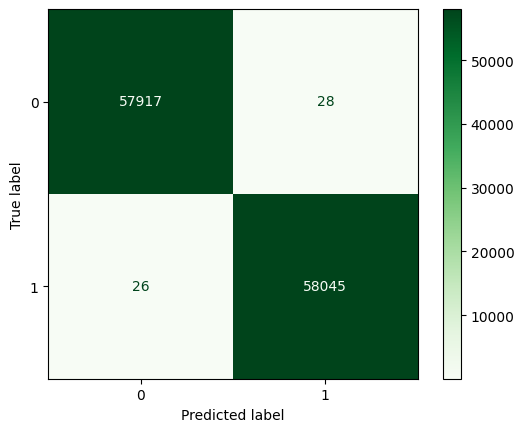

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap=plt.cm.Greens)

In [26]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99955   0.99952   0.99953     57945
           1    0.99952   0.99955   0.99954     58071

    accuracy                        0.99953    116016
   macro avg    0.99953   0.99953   0.99953    116016
weighted avg    0.99953   0.99953   0.99953    116016



In [27]:
!python -m pip install joblib


In [30]:
import joblib
!mkdir trained_models

A subdirectory or file trained_models already exists.


In [32]:
joblib.dump(model, r".\trained_models\remote-random-forest-classifier.pkl")

['.\\trained_models\\remote-random-forest-classifier.pkl']

In [33]:
# model = joblib.load(f".\trained_models\remote-random-forest-classifier")
model = joblib.load(r".\trained_models\remote-random-forest-classifier.pkl")
model

RandomForestClassifier(bootstrap=False,
                       class_weight={0: 0.9999418216294254,
                                     1: 1.0000581851408081},
                       max_features=10, n_estimators=75, random_state=1)

In [35]:
print(model)

RandomForestClassifier(bootstrap=False,
                       class_weight={0: 0.9999418216294254,
                                     1: 1.0000581851408081},
                       max_features=10, n_estimators=75, random_state=1)


In [36]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [49]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25,14), dpi = 800)
tree.plot_tree(model.estimators_[0],
    filled=False,
    rounded=False,
    fontsize=6)
plt.savefig('rf_clf_estimator', dpi=800)

In [38]:
!pip install scikit-learn xgboost catboost lightgbm matplotlib

In [39]:
from sklearn.ensemble import BaggingClassifier